In [56]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

df = pd.read_csv(r'C:\Users\Xavier\Decision-Bot\data\NYPD_Arrest_Data_2023.csv')

# WebLink to Data : https://www.kaggle.com/datasets/justinpakzad/nypd-arrests-2023-dataset
# Weblink to Codes : https://www.n2nov.net/nypdcodes.html

In [57]:
df.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
0,261209118,01/01/2023,109,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200501,F,K,77,0,45-64,F,BLACK,999335,186085,40.677426,-73.945615
1,262984267,02/03/2023,515,"CONTROLLED SUBSTANCE,SALE 3",117.0,DANGEROUS DRUGS,PL 2203901,F,K,73,0,25-44,M,BLACK,1009318,178259,40.655923,-73.909650
2,263664549,02/15/2023,105,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,K,62,0,25-44,M,WHITE,982272,158771,40.602468,-74.007120
3,261345231,01/04/2023,105,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,M,32,0,25-44,M,BLACK,999899,238684,40.821797,-73.943457
4,263536618,02/13/2023,109,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 12005WX,F,K,71,0,25-44,M,BLACK,1001437,183080,40.669175,-73.938042


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170095 entries, 0 to 170094
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ARREST_KEY         170095 non-null  int64  
 1   ARREST_DATE        170095 non-null  object 
 2   PD_CD              170095 non-null  int64  
 3   PD_DESC            170095 non-null  object 
 4   KY_CD              170082 non-null  float64
 5   OFNS_DESC          170095 non-null  object 
 6   LAW_CODE           170095 non-null  object 
 7   LAW_CAT_CD         168838 non-null  object 
 8   ARREST_BORO        170095 non-null  object 
 9   ARREST_PRECINCT    170095 non-null  int64  
 10  JURISDICTION_CODE  170095 non-null  int64  
 11  AGE_GROUP          170095 non-null  object 
 12  PERP_SEX           170095 non-null  object 
 13  PERP_RACE          170095 non-null  object 
 14  X_COORD_CD         170095 non-null  int64  
 15  Y_COORD_CD         170095 non-null  int64  
 16  La

In [59]:
df.isna().sum() 
#Finds null values in data (0 = No Missing Data)

ARREST_KEY              0
ARREST_DATE             0
PD_CD                   0
PD_DESC                 0
KY_CD                  13
OFNS_DESC               0
LAW_CODE                0
LAW_CAT_CD           1257
ARREST_BORO             0
ARREST_PRECINCT         0
JURISDICTION_CODE       0
AGE_GROUP               0
PERP_SEX                0
PERP_RACE               0
X_COORD_CD              0
Y_COORD_CD              0
Latitude                0
Longitude               0
dtype: int64

#### Removing Irrelevant Data to our project
* Coordinate info
* LAW_CAT_CD

In [60]:
#Removing Unnecessary Data
new_df = df.dropna()
#This code creates a new data set, whilst removing null values

In [61]:
#Data Removed
new_df.isna().sum()
#Testing to ensure the null values are removed 

ARREST_KEY           0
ARREST_DATE          0
PD_CD                0
PD_DESC              0
KY_CD                0
OFNS_DESC            0
LAW_CODE             0
LAW_CAT_CD           0
ARREST_BORO          0
ARREST_PRECINCT      0
JURISDICTION_CODE    0
AGE_GROUP            0
PERP_SEX             0
PERP_RACE            0
X_COORD_CD           0
Y_COORD_CD           0
Latitude             0
Longitude            0
dtype: int64

In [62]:
new_df = new_df.drop(columns = ['X_COORD_CD', 'Y_COORD_CD', 'Latitude', 'Longitude'], axis = 1) 
# new_df is being reassigned to NEW_DF with the updated data (Removing coordinates)

In [63]:
a = 0 # '0' Patrol 
b = 0 # '1' Transit
c = 0 # '2' Housing 
d = 0 # '3' Non-NYPD

# This is making lists for each Jurisdiction code 

for x in new_df["JURISDICTION_CODE"]: 
    if x == 0: # If x reads code 0
        a += 1 # A counts up 
    elif x == 1: # If x counts code 1 
        b += 1 # B counts up 
    elif x == 2: # If x reads code 2 
        c += 1 # C counts up
    else: 
        x == 3 # If x reads code 3 
        d += 1 # D counts up

print (f"Patrol jurisdiction arrests: {a} \n" # Prints each jurisdiction code arrests
       f"Tranist jurisdiction arrests: {b} \n"
       f"Housing jurisdiction arrests: {c} \n"
       f"Non-NYPD jurisdiction arrests: {d} \n") # 'f' required before "{'lists made'}" to ensure that it formats the int to print 

Patrol jurisdiction arrests: 150598 
Tranist jurisdiction arrests: 7966 
Housing jurisdiction arrests: 6262 
Non-NYPD jurisdiction arrests: 3999 



### We can determine that mosts arrests are made by Patrol jurisdiction

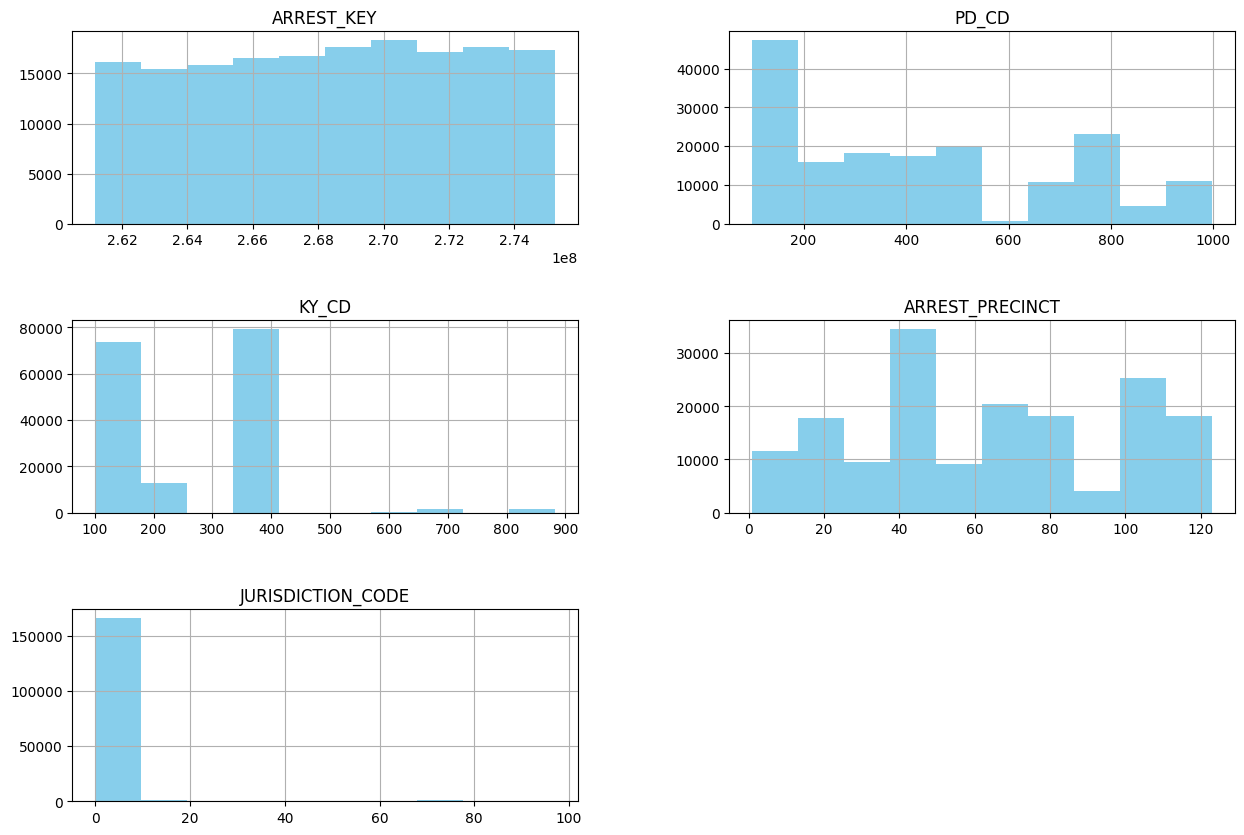

In [64]:
new_df.hist(figsize = (15,10), color = 'skyblue')
plt.subplots_adjust(hspace = 0.5) 
plt.show()

# After viewing that the data is only corresponding to types of int64/float64 we must now organize data for objects as they do not appear. 

## Objects to be converted
### Easiest (Top)
* Sex; m = 0, f = 1 [DONE] 
* Law Cat CD; Violation = 0, Misdemeanor = 1, Felony = 2; [DONE]
* Jurisdiction code; Patrol = 0, Transit = 1, Housing = 2, Non-NYPD = 3; [Integer to convert]
* Arrest Borough; Bk, Bx, Q, M, S = [0-4]; 
* PD_CD = PD_DESC(Run loop to find which codes equal desc) [Ex:PD_CD = 105 == PD_DESC = Strangulation 1st]
* Arrest Date; if 1, Jan. (Date range to determine which week. Ex: if x < 1 || x > 31;)
* Age Group (<18 = 0, 18-24 = 1, 25-44 = 2, 45-64 = 3, 65+ = 4)
* Perp Race (White = 0, Black = 1, White Hispanic = 2, Black Hispanic = 3, Asian/ PI = 4)
* Law Code {We have no fucking clue}
#### Hardest (Bottom)

In [36]:
## This is to identify the individual sexes that have commited crimes respectively (PERP_SEX)

Male = []

for x in new_df["PERP_SEX"]:
    if x =='M':
        Male.append(x)

Male_Num = len(Male)
print(f"This many Males have committed a crime: {Male_Num}")

Female = []

for x in new_df["PERP_SEX"]:
    if x =='F':
        Female.append(x)

Female_Num = len(Female)

print(f"This many Females have committed a crime: {Female_Num}")

This many Males have committed a crime: 135866
This many Females have committed a crime: 28827


In [38]:
## This is to drop 2 categories in LAW_CAT_CD section as they are irrelevant

new_df = new_df.drop(new_df[new_df['LAW_CAT_CD'] == '9'].index)
new_df = new_df.drop(new_df[new_df['LAW_CAT_CD'] == 'I'].index)

## After testing, this code has removed the aforementioned 2 columns

In [40]:
## This is to count the individual crimes in terms of status of Law 

Felony = []
Violation = []
Misdemeanor = []

for x in new_df["LAW_CAT_CD"]: 
    if x == 'F':
        Felony.append(x)
    elif x == 'M':
        Misdemeanor.append(x)
    elif x == 'V':
        Violation.append(x)

Felony_Num = len(Felony)
Misdemeanor_Num = len(Misdemeanor)
Violation_Num = len(Violation)

print(f"This many Felonies have been committed: {Felony_Num}")
print(f"This many Violations have been committed: {Violation_Num}")
print(f"This many Misdemeanors have been committed: {Misdemeanor_Num}")

This many Felonies have been committed: 73853
This many Violations have been committed: 973
This many Misdemeanors have been committed: 93347
